In [14]:
import numpy as np
np.random.seed(1337)
from keras.models import Sequential
from keras.layers import Dense # 全連接層
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

In [12]:
# create data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)
Y = 0.5*X + 2 + np.random.normal(0, 0.5, (200, ))

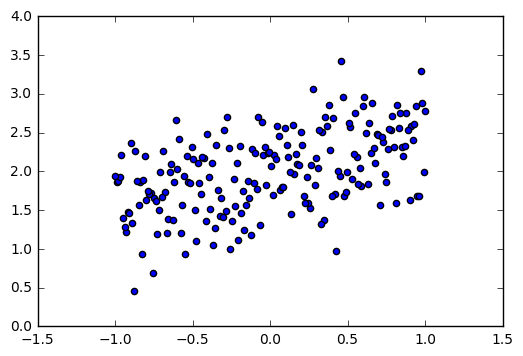

In [13]:
# plot data
plt.scatter(X, Y)
plt.show()

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
#X_train, Y_train = X[:160], Y[:160]
#X_test , Y_test  = X[160:], Y[160:]

In [22]:
## build a neural network from 1st layer to last layer
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1))
## if there are multi-layer, default input_dim of 2nd layer is last layer's output
#model.add(Dense(output_dim=1) 

In [23]:
## choose model and optimization method
model.compile(loss='mse', optimizer='sgd')

In [24]:
## training
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost: ', cost)

train cost:  4.34127
train cost:  0.289194
train cost:  0.196136
train cost:  0.189043


In [26]:
## testing
cost = model.evaluate(X_test, Y_test, batch_size=Y_test.size)
print('test cost: ', cost)
W, b = model.layers[0].get_weights()
print('Weights: ', W)
print('biases: ', b)

60/60 [==============================] - 0s
test cost:  0.240802630782
Weights:  [[ 0.52850699]]
biases:  [ 2.01954937]


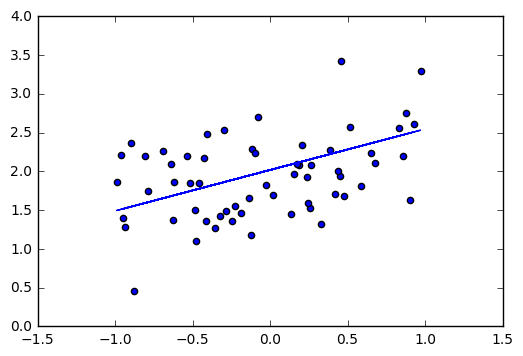

In [27]:
## prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()
